In [10]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [12]:
titanic = pd.read_csv("Titanic.csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


Observations
- All columns are object data type and categorical in nature
- There are no null vaues
- As the columns are categorical , we can adopt one-hot-encoding

In [17]:
df = pd.get_dummies(titanic,dtype=int)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Class_1st      2201 non-null   int32
 1   Class_2nd      2201 non-null   int32
 2   Class_3rd      2201 non-null   int32
 3   Class_Crew     2201 non-null   int32
 4   Gender_Female  2201 non-null   int32
 5   Gender_Male    2201 non-null   int32
 6   Age_Adult      2201 non-null   int32
 7   Age_Child      2201 non-null   int32
 8   Survived_No    2201 non-null   int32
 9   Survived_Yes   2201 non-null   int32
dtypes: int32(10)
memory usage: 86.1 KB


APRIORI ALGORIITHM

In [24]:
frequent_itemsets = apriori(df, min_support = 0.05, use_colnames=True, max_len=None)
frequent_itemsets

C:\Users\anilk\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
...,...,...
58,0.053612,"(Survived_No, Age_Adult, Class_1st, Gender_Male)"
59,0.069968,"(Age_Adult, Survived_No, Class_2nd, Gender_Male)"
60,0.175829,"(Class_3rd, Age_Adult, Survived_No, Gender_Male)"
61,0.304407,"(Gender_Male, Survived_No, Age_Adult, Class_Crew)"


In [34]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Class_1st),(Gender_Female),0.147660,0.213539,0.065879,0.446154,2.089329,1.0,0.034348,1.419998,0.611701,0.223077,0.295774,0.377332
1,(Gender_Female),(Class_1st),0.213539,0.147660,0.065879,0.308511,2.089329,1.0,0.034348,1.232615,0.662941,0.223077,0.188716,0.377332
2,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,1.0,0.004587,1.005694,0.639010,0.152050,0.005661,0.567012
3,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,1.0,0.004587,2.682493,0.037128,0.152050,0.627212,0.567012
4,(Class_1st),(Survived_Yes),0.147660,0.323035,0.092231,0.624615,1.933584,1.0,0.044531,1.803390,0.566471,0.243697,0.445489,0.455064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,"(Age_Adult, Class_Crew)","(Survived_Yes, Gender_Male)",0.402090,0.166742,0.087233,0.216949,1.301104,1.0,0.020188,1.064117,0.387051,0.181132,0.060254,0.370055
160,"(Survived_Yes, Class_Crew)","(Age_Adult, Gender_Male)",0.096320,0.757383,0.087233,0.905660,1.195776,1.0,0.014282,2.571740,0.181174,0.113811,0.611158,0.510419
161,(Gender_Male),"(Survived_Yes, Age_Adult, Class_Crew)",0.786461,0.096320,0.087233,0.110919,1.151565,1.0,0.011481,1.016420,0.616356,0.109652,0.016155,0.508289
162,(Class_Crew),"(Survived_Yes, Age_Adult, Gender_Male)",0.402090,0.153567,0.087233,0.216949,1.412737,1.0,0.025486,1.080943,0.488626,0.186227,0.074882,0.392498


In [36]:
rules.sort_values(by='lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
107,"(Age_Adult, Gender_Female)","(Class_1st, Survived_Yes)",0.193094,0.092231,0.063607,0.329412,3.571602,1.0,0.045798,1.353691,0.892314,0.286885,0.261279,0.509533
110,"(Class_1st, Survived_Yes)","(Age_Adult, Gender_Female)",0.092231,0.193094,0.063607,0.689655,3.571602,1.0,0.045798,2.600030,0.793168,0.286885,0.615389,0.509533
114,(Gender_Female),"(Age_Adult, Class_1st, Survived_Yes)",0.213539,0.089505,0.063607,0.297872,3.328005,1.0,0.044495,1.296766,0.889453,0.265655,0.228851,0.504266
103,"(Age_Adult, Class_1st, Survived_Yes)",(Gender_Female),0.089505,0.213539,0.063607,0.710660,3.328005,1.0,0.044495,2.718119,0.768285,0.265655,0.632098,0.504266
33,"(Class_1st, Survived_Yes)",(Gender_Female),0.092231,0.213539,0.064062,0.694581,3.252709,1.0,0.044367,2.575025,0.762930,0.265038,0.611654,0.497291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,1.0,0.009900,1.419023,0.046906,0.670709,0.295290,0.826241
20,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,1.0,0.009870,1.051116,0.263149,0.773191,0.048630,0.879936
21,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,1.0,0.009870,1.339441,0.061028,0.773191,0.253420,0.879936
118,"(Age_Adult, Survived_No)","(Class_1st, Gender_Male)",0.653339,0.081781,0.053612,0.082058,1.003392,1.0,0.000181,1.000302,0.009752,0.078667,0.000302,0.368807


###Conclusion
- Abult Females travelling in 1st class were among the most survived.

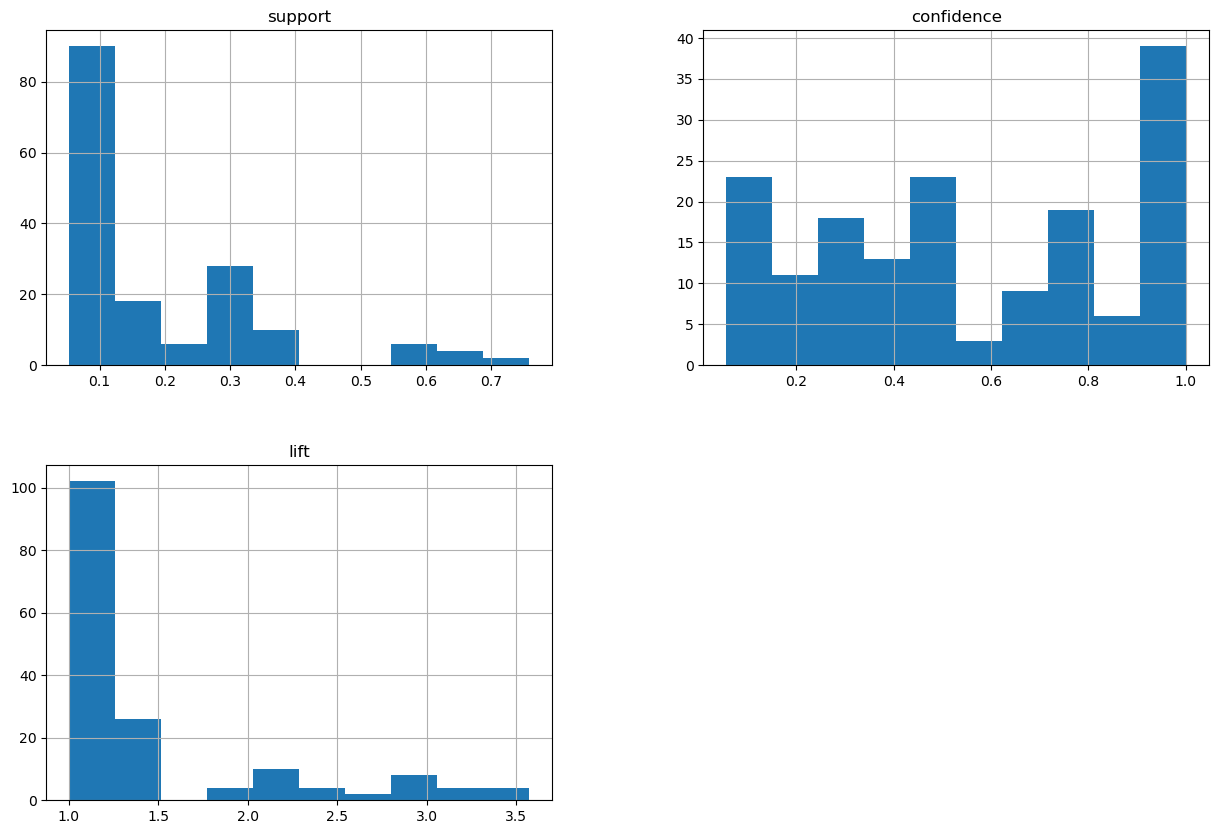

In [47]:
import matplotlib.pyplot as ply
rules[['support','confidence','lift']].hist(figsize=(15,10))
plt.show()

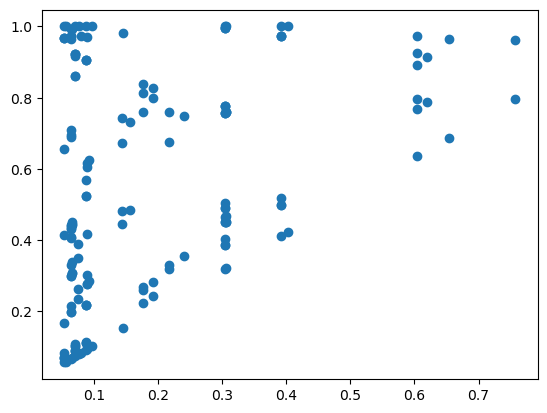

In [51]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

The confidence value is increasing with increase in suport for most.

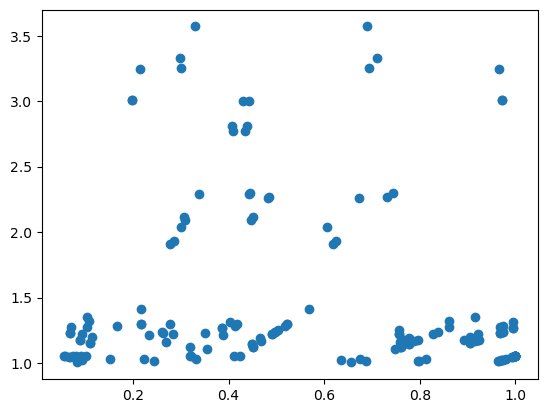

In [57]:
plt.scatter(rules['confidence'], rules['lift'])
plt.show()

In [59]:
rules[rules["consequents"]==({"Survied_yes"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
